In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [95]:
cv2.hconcat([house,mag])

error: OpenCV(4.5.5) /Users/runner/miniforge3/conda-bld/libopencv_1646358758677/work/modules/core/src/matrix_operations.cpp:67: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].rows == src[0].rows && src[i].type() == src[0].type() in function 'hconcat'


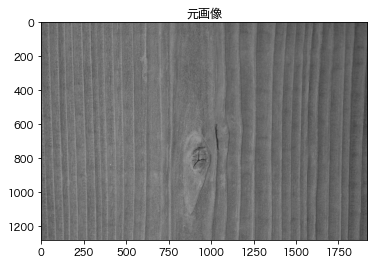

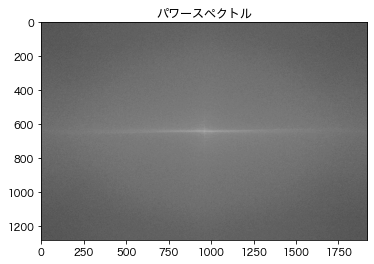

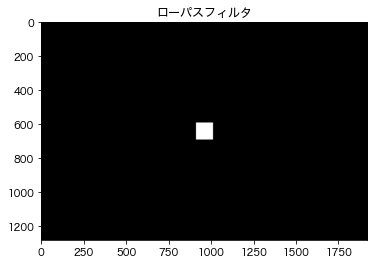

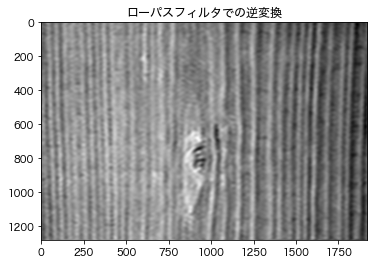

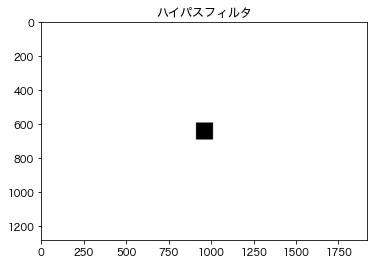

115.22992431640625


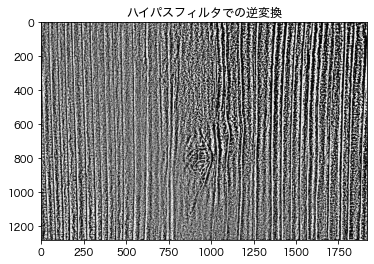

In [144]:
# 画像の読み込みと元画像の表示
house = cv2.imread('./../fig_raw/wood_3.jpg',0)
plt.imshow(house,cmap='gray')
plt.title('元画像')
plt.show()



# 2次元フーリエ変換で、パワースペクトルを表示
fimg = np.fft.fft2(house)
# 第1象限と第3象限, 第2象限と第4象限を入れ替え
fimg =  np.fft.fftshift(fimg)
# パワースペクトルの計算
mag = 20*np.log(np.abs(fimg))
plt.imshow(mag,cmap='gray')
plt.title('パワースペクトル')
plt.show()
print(f'================================================================================================')


# ローパス・ハイパスフィルタに関する定数（領域の指定範囲）
k = 50
# ローパスフィルタによる、低周波数帯の画像を抽出
lower_mask = np.zeros(mag.shape)
r_x = int(lower_mask.shape[0]/2)
r_y = int(lower_mask.shape[1]/2)

lower_mask[(r_x-k):(r_x+k),(r_y-k):(r_y+k)] = 1
plt.imshow(lower_mask,cmap='gray')
plt.title('ローパスフィルタ')
plt.show()

# ローパスフィルタで逆変換
fimg_lower = np.where(lower_mask>0,fimg,0)
mag_lower = np.fft.fftshift(fimg_lower)
ifimage = np.fft.ifft2(mag_lower).real
ifimage = np.uint8(ifimage)

plt.imshow(ifimage,cmap='gray')
plt.title('ローパスフィルタでの逆変換')
plt.show()
print(f'================================================================================================')


# ハイパスフィルタによる、高周波数帯の画像を抽出
high_mask = np.ones(mag.shape)
r_x = int(high_mask.shape[0]/2)
r_y = int(high_mask.shape[1]/2)

high_mask[(r_x-k):(r_x+k),(r_y-k):(r_y+k)] = 0
plt.imshow(high_mask,cmap='gray')
plt.title('ハイパスフィルタ')
plt.show()

# ハイパスフィルタで逆変換
fimg_high = np.where(high_mask>0,fimg,0)
mag_high = np.fft.fftshift(fimg_high)
ifimage = np.fft.ifft2(mag_high).real
ifimage = np.uint8(ifimage)
print(ifimage.mean())

plt.imshow(ifimage,cmap='gray')
plt.title('ハイパスフィルタでの逆変換')
plt.show()
print(f'================================================================================================')